In [121]:
import numpy as np 
import gym   
import random
from collections import defaultdict
from IPython.display import clear_output
from datetime import datetime
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3")
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [118]:
action_size = env.action_space.n
print("Action Size: ", action_size)

state_size = env.observation_space.n
print("State Size: ", state_size)

Action Size:  6
State Size:  500


In [136]:
class Q_Learning():
    
    def __init__(self, gamma = 0.95, learning_rate = 1, epsilon = 0.00001, nepisodes = 5000):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.nepisodes = nepisodes
        self.Q = np.zeros((state_size, action_size))

    def greedy_policy(self, state):
        return np.argmax(self.Q[state])

    def epsilon_greedy_policy(self, state):
        action = 0
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(env.action_space.n)
        else:
            action = self.greedy_policy(state)
        return action

    def offpolicy_control(self, test_episodes):
        
        start = datetime.now()
        rewards = []
        
        for episode in range(self.nepisodes):
            state = env.reset()
            done = False
            total_rewards = 0
            
            while not done:
                action = self.epsilon_greedy_policy(state)
                next_state, reward, done, info = env.step(action)
                self.Q[state][action] = self.Q[state][action] + self.learning_rate*(reward + self.gamma*np.max(self.Q[next_state]) - self.Q[state][action])
                state = next_state
                
            ep_avg, max_rew, min_rew = self.test_policy(test_episodes)
            rewards.append(ep_avg)
            
            if episode % 100 == 0:
                print(f'Episode: {episode} Average Reward: {ep_avg}')
                print(f'Maximum Reward : {max_rew} Minimum Reward: {min_rew}')
            
            if ep_avg > 9:
                if ep_avg < 9.5:
                    print(f'Solved! Episode: {episode} Average Reward: {ep_avg}')
                    
                    fig = plt.figure()
                    ax = fig.add_subplot(111)
                    plt.plot(np.arange(len(rewards)), rewards)
                    plt.ylabel('Average Reward')
                    plt.xlabel('Episode #')
                    plt.show()
                    end = datetime.now()
                    print("Solved in: ", (end-start))
                    
                    return self.Q
                    
                else:
                    continue     
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(rewards)), rewards)
        plt.ylabel('Average Reward')
        plt.xlabel('Episode #')
        plt.show()
        
        end = datetime.now()
        print("Not Solved")
        print((end-start))
        return self.Q
    
    def test_policy(self, n):

        episode_rewards = []
        max_rewards = []
        min_rewards = []
        
        for episode in range(n):
            state = env.reset()
            done = False
            cum_rewards = 0
            while not done:
                action = self.greedy_policy(state)
                state, reward, done, info = env.step(action)
                cum_rewards += reward
                
            episode_rewards.append(cum_rewards)
        
        max_rewards.append(max(episode_rewards))
        min_rewards.append(min(episode_rewards))
        
                
        return sum(episode_rewards)/n, max_rewards, min_rewards

Episode: 0 Average Reward: -217.955
Maximum Reward : [-200] Minimum Reward: [-2000]
Episode: 100 Average Reward: -189.45
Maximum Reward : [12] Minimum Reward: [-200]
Episode: 200 Average Reward: -109.3
Maximum Reward : [15] Minimum Reward: [-2000]
Episode: 300 Average Reward: -71.445
Maximum Reward : [15] Minimum Reward: [-200]
Episode: 400 Average Reward: -49.18
Maximum Reward : [15] Minimum Reward: [-200]
Episode: 500 Average Reward: -33.17
Maximum Reward : [15] Minimum Reward: [-2000]
Episode: 600 Average Reward: -11.955
Maximum Reward : [15] Minimum Reward: [-200]
Episode: 700 Average Reward: -14.69
Maximum Reward : [15] Minimum Reward: [-2000]
Episode: 800 Average Reward: -11.405
Maximum Reward : [15] Minimum Reward: [-2000]
Episode: 900 Average Reward: -16.35
Maximum Reward : [15] Minimum Reward: [-2000]
Episode: 1000 Average Reward: -6.29
Maximum Reward : [14] Minimum Reward: [-2000]
Episode: 1100 Average Reward: 3.675
Maximum Reward : [14] Minimum Reward: [-200]
Episode: 1200 A

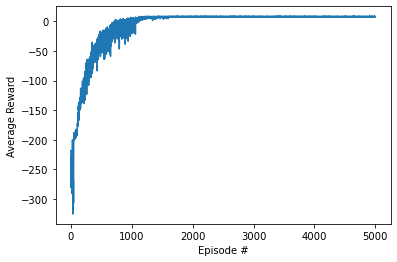

Not Solved
0:07:28.511562


In [137]:
a = Q_Learning()
Q = a.offpolicy_control(200)